# Nairaland Politics project

### Background of the project: 
Nairaland is a Discussion forum where people come and share their thoughts on different topics. <br>
The site is divided into categories and sections to guide the users. 

### Scope of the project: 
This project shall focus on the first 300 pages of the politics section of nairaland.com 

### Project Questions:
1 What is the topic with the highest number of views <br>
2 What is the topic and original Poster of the topic with the highest number view <br>
3 What is the topic and original Poster of the topic with the highest number of comments or updates <br>
4 Which post was last updated and when in the 300 pages scraped or oldest in terms of update <br>
5 Who are the most active users in the politics section of Nairaland and how many topics did they create  <br>
6 Which month had the highest number of Headings <br>
7 Any other question that can help us understand the data very accurately

### Project Task:
task 1 : Write a python script to scrape 300 pages from politics category of nairaland.com <br>
task 2 : using necessary libraries clean and analyze the data <br>
task 3 : present your result using suitable visualization

### Skills demonstrated in the Project :
1 Web scraping  <br>
2 Regular expression usage <br>
3 Writing to a file <br>
4 Data manipulation <br>
5 Data cleaning <br>
6 Data visualization <br>
7 Research <br>
8 Documentation

### Column name definitions for the project :
1 Heading : The title of the thread <br> 
2 Poster : The person that created the thread <br> 
3 Updated : How many times contributions have been added to the thread <br> 
4 Viewed : How many people opened the thread to read the content without contribution <br> 
5 Time : The time and date the last contribution was made on the thread <br> 
6 Last_Updated : The lasted person to make contribution to the thread

# PART 1 <br>

### Sample scraping for testing

In [17]:
import requests
from bs4 import BeautifulSoup
import re
import csv

url = 'https://www.nairaland.com/politics/'
with open('politics3.csv', 'w', newline='', encoding='utf-8') as f:
    thewriter = csv.writer(f)
    thewriter.writerow(['Heading', 'Poster', 'Updated', 'Viewed', 'Time', 'Last_Updated'])

    for page in range(1, 4):

        reqs = requests.get(url + str(page))
        soup = BeautifulSoup(reqs.text, 'lxml')


        for td in soup.find_all("td", {'id': re.compile(r'^top')}):
            heading = [a.text.strip() for a in td.find_all('a')][1]
            poster =  td.select('span b')[0].text.strip()
            updated =  td.select('span b')[1].text.strip()
            viewed =  td.select('span b')[2].text.strip()
            time =  td.select('span b')[3].text.strip()
            try:
                last_updated =  td.select('span b')[4].text.strip()
   
            except IndexError :
                last_updated = ''
            
            thewriter.writerow([heading, poster, updated, viewed, time, last_updated])
        
print('I am done')

I am done


### Main scraping for the project

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import csv

url = 'https://www.nairaland.com/politics/'
with open('politics300.csv', 'w', newline='', encoding='utf-8') as f:
    thewriter = csv.writer(f)
    thewriter.writerow(['Heading', 'Poster', 'Updated', 'Viewed', 'Time', 'Date_Last_Updated', 'Last_Updated_user'])

    for page in range(0, 300):

        reqs = requests.get(url + str(page))
        soup = BeautifulSoup(reqs.text, 'lxml')


        for td in soup.find_all("td", {'id': re.compile(r'^top')}):
            heading = [a.text.strip() for a in td.find_all('a')][1]
            poster =  td.select('span b')[0].text.strip()
            updated =  td.select('span b')[1].text.strip()
            viewed =  td.select('span b')[2].text.strip()
            time =  td.select('span b')[3].text.strip()
            try:
                date_last_updated =  td.select('span b')[4].text.strip()
   
            except IndexError :
                date_last_updated = ''
            try:
                last_updated_user =  td.select('span b')[5].text.strip()
   
            except IndexError :
                last_updated_user = ''
            
            thewriter.writerow([heading, poster, updated, viewed, time, date_last_updated, last_updated_user])
            
        

# PART 2

#### Minor  Column adjustment was performed on the dataset after scrapping due to internal workings and configuration of nairaland

In [2]:
# Importing the necessary libraries for project and brining in the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
politics = pd.read_csv('politics300_edited.csv')
politics.head()

,Heading,Poster,Updated,Viewed,Time,Date_Last_Updated,Last_Updated_user
0,Nairaland Says No To Secessionists,Seun,4503,512130,3:14am,30-May,Cosmatikka
1,Wike: Nobody Obeyed IPOB Sit At Home Order In ...,nairavsdollars,11,106,6:50am,1-Jun,sapphiere
2,"2023: Kingsley Moghalu Declares For President,...",powerfulguy,58,4175,6:50am,1-Jun,Martialb1
3,Meet A Northern Nigerian Man Who Wears Corpora...,Iambodemartins,10,183,6:50am,1-Jun,Coronabirus
4,Buhari Charges Security Agencies To Rescue Abd...,Insidenaija,42,1592,6:50am,1-Jun,Hollawayn05


In [3]:
# Display full lenght of column content
pd.set_option('display.max_colwidth', -1)

In [4]:
#checking  the first five rows of the data 
politics.head()

,Heading,Poster,Updated,Viewed,Time,Date_Last_Updated,Last_Updated_user
0,Nairaland Says No To Secessionists,Seun,4503,512130,3:14am,30-May,Cosmatikka
1,Wike: Nobody Obeyed IPOB Sit At Home Order In Rivers,nairavsdollars,11,106,6:50am,1-Jun,sapphiere
2,"2023: Kingsley Moghalu Declares For President, Unveils SWAG Agenda",powerfulguy,58,4175,6:50am,1-Jun,Martialb1
3,Meet A Northern Nigerian Man Who Wears Corporate To Sell Kola Nut In Abuja.,Iambodemartins,10,183,6:50am,1-Jun,Coronabirus
4,Buhari Charges Security Agencies To Rescue Abducted Niger State Schoolchildren,Insidenaija,42,1592,6:50am,1-Jun,Hollawayn05


In [5]:
#looking at the last 10 records in our dataset 
politics.tail(10)

,Heading,Poster,Updated,Viewed,Time,Date_Last_Updated,Last_Updated_user
16094,Fulani Now Have Online Psychological Warriors,ezenwajosh,41,702,3:03pm,9-Mar,chiedozie198100
16095,"Umahi Plots To Accuse Me Of Sponsoring ESN, PDP Vice Chair Raises Alarm",BleedingPen,2,142,3:02pm,9-Mar,AlexBells
16096,"Governor Dapo Abiodun, Deputy Takes COVID-19 Vaccine",References1,36,5101,2:29pm,9-Mar,pentax
16097,"Wike Criticizes APC Membership Registration, Revalidation Exercise",gistsmill04,53,13142,2:22pm,9-Mar,VictorUSA
16098,Tenure Extension: I Can Remain In Office Untill 2023 Or 2024 — IGP Adamu,theBLOODofJESUS,70,21856,2:18pm,9-Mar,profbray
16099,"Drama As PANPIEC Clash With CCAD Over Sen. Abaribe & Kalu, Prince Erondu Reacts",Saintbossman,3,129,2:13pm,9-Mar,TotoGame
16100,INEC: 2023 General Election Must Be Better Than Previous Ones,BluntCrazeMan,62,3282,2:05pm,9-Mar,Gobdddd
16101,Ohanaeze Ndigbo Must Key Into Our Secession Agenda – MASSOB,gidgiddy,9,142,2:05pm,9-Mar,AdakaBoro8
16102,"Osinbajo's Friends, Associates Announce Empowerment Programme In His Honor",madamgrace,49,9880,1:39pm,9-Mar,klimkid
16103,Buhari Congratulates Prof. Ibeh On Commonwealth Education Appointment,Redcrafton,10,269,1:37pm,9-Mar,TotoGame


In [6]:
# summary information about our data
politics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16104 entries, 0 to 16103
Data columns (total 7 columns):
Heading              16101 non-null object
Poster               15941 non-null object
Updated              16104 non-null int64
Viewed               16104 non-null object
Time                 16104 non-null object
Date_Last_Updated    16103 non-null object
Last_Updated_user    15946 non-null object
dtypes: int64(1), object(6)
memory usage: 880.8+ KB


In [7]:
# checking for unique entries for each column
politics.nunique()

Heading              15841
Poster               3472 
Updated              432  
Viewed               5769 
Time                 1430 
Date_Last_Updated    87   
Last_Updated_user    5457 
dtype: int64

In [8]:
# Calculating columns with missing data
politics.isnull().sum()

Heading              3  
Poster               163
Updated              0  
Viewed               0  
Time                 0  
Date_Last_Updated    1  
Last_Updated_user    158
dtype: int64

In [9]:
#confirming the number of rows and columns in our dataset
politics.shape

(16104, 7)

In [10]:
# checking the name of our columns
politics.columns

Index(['Heading', 'Poster', 'Updated', 'Viewed', 'Time', 'Date_Last_Updated',
       'Last_Updated_user'],
      dtype='object')

#### Note: Error was left on purpose for illustration

In [11]:
# Converting Viewed column to numeric, the error message shows that some records are not appropriate for the column
# This error message was left here deliberately
politics['Viewed'] = pd.to_numeric(politics['Viewed'])

ValueError: Unable to parse string "4:27pm" at position 4671

In [12]:
#checking the Viewed Column to identify wrong entries (it contains time instead of numbers)
viewed_err = politics['Viewed'].str.contains('am|pm')
viewed_err.sum()

3

In [13]:
# checking for datatype
type(viewed_err)


pandas.core.series.Series

In [14]:
# identifying the index location of the 3 records with wrong entries for Viewed column
[i for i in viewed_err.index if viewed_err[i]]

[4671, 4675, 6350]

In [15]:
#Dropping the 3 rows that was causing problem for Viewed Column
politics_1 = politics.drop([4671, 4675, 6350])

In [16]:
# Viewed Column successfully converted to numeric
politics_1['Viewed'] = pd.to_numeric(politics_1['Viewed'])

In [17]:
# Verifying our conversion
politics_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16101 entries, 0 to 16103
Data columns (total 7 columns):
Heading              16098 non-null object
Poster               15938 non-null object
Updated              16101 non-null int64
Viewed               16101 non-null int64
Time                 16101 non-null object
Date_Last_Updated    16101 non-null object
Last_Updated_user    15946 non-null object
dtypes: int64(2), object(5)
memory usage: 1006.3+ KB


In [18]:
# Adding year to our Date column
politics_1['Date_Last_Updated'] = politics_1['Date_Last_Updated'] + '-2021'

In [19]:
politics_1.head()

,Heading,Poster,Updated,Viewed,Time,Date_Last_Updated,Last_Updated_user
0,Nairaland Says No To Secessionists,Seun,4503,512130,3:14am,30-May-2021,Cosmatikka
1,Wike: Nobody Obeyed IPOB Sit At Home Order In Rivers,nairavsdollars,11,106,6:50am,1-Jun-2021,sapphiere
2,"2023: Kingsley Moghalu Declares For President, Unveils SWAG Agenda",powerfulguy,58,4175,6:50am,1-Jun-2021,Martialb1
3,Meet A Northern Nigerian Man Who Wears Corporate To Sell Kola Nut In Abuja.,Iambodemartins,10,183,6:50am,1-Jun-2021,Coronabirus
4,Buhari Charges Security Agencies To Rescue Abducted Niger State Schoolchildren,Insidenaija,42,1592,6:50am,1-Jun-2021,Hollawayn05


In [20]:
# Converting our Date_Last_Updated to  datetime64 datatype 
politics_1['Date_Last_Updated'] = politics_1['Date_Last_Updated'].astype('datetime64')

In [21]:
politics_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16101 entries, 0 to 16103
Data columns (total 7 columns):
Heading              16098 non-null object
Poster               15938 non-null object
Updated              16101 non-null int64
Viewed               16101 non-null int64
Time                 16101 non-null object
Date_Last_Updated    16101 non-null datetime64[ns]
Last_Updated_user    15946 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1006.3+ KB


In [22]:
# Breaking our Date_Last_Updated into Day, Month and year
politics_1['Day'] = politics_1['Date_Last_Updated'].dt.day 
politics_1['Month'] = politics_1['Date_Last_Updated'].dt.month
politics_1['Year'] = politics_1['Date_Last_Updated'].dt.year

In [23]:
politics_1.head()

,Heading,Poster,Updated,Viewed,Time,Date_Last_Updated,Last_Updated_user,Day,Month,Year
0,Nairaland Says No To Secessionists,Seun,4503,512130,3:14am,2021-05-30,Cosmatikka,30,5,2021
1,Wike: Nobody Obeyed IPOB Sit At Home Order In Rivers,nairavsdollars,11,106,6:50am,2021-06-01,sapphiere,1,6,2021
2,"2023: Kingsley Moghalu Declares For President, Unveils SWAG Agenda",powerfulguy,58,4175,6:50am,2021-06-01,Martialb1,1,6,2021
3,Meet A Northern Nigerian Man Who Wears Corporate To Sell Kola Nut In Abuja.,Iambodemartins,10,183,6:50am,2021-06-01,Coronabirus,1,6,2021
4,Buhari Charges Security Agencies To Rescue Abducted Niger State Schoolchildren,Insidenaija,42,1592,6:50am,2021-06-01,Hollawayn05,1,6,2021


In [24]:
politics_1.tail()

,Heading,Poster,Updated,Viewed,Time,Date_Last_Updated,Last_Updated_user,Day,Month,Year
16099,"Drama As PANPIEC Clash With CCAD Over Sen. Abaribe & Kalu, Prince Erondu Reacts",Saintbossman,3,129,2:13pm,2021-03-09,TotoGame,9,3,2021
16100,INEC: 2023 General Election Must Be Better Than Previous Ones,BluntCrazeMan,62,3282,2:05pm,2021-03-09,Gobdddd,9,3,2021
16101,Ohanaeze Ndigbo Must Key Into Our Secession Agenda – MASSOB,gidgiddy,9,142,2:05pm,2021-03-09,AdakaBoro8,9,3,2021
16102,"Osinbajo's Friends, Associates Announce Empowerment Programme In His Honor",madamgrace,49,9880,1:39pm,2021-03-09,klimkid,9,3,2021
16103,Buhari Congratulates Prof. Ibeh On Commonwealth Education Appointment,Redcrafton,10,269,1:37pm,2021-03-09,TotoGame,9,3,2021


In [25]:
# Getting statistical idea of our data
politics_1.describe()

,Updated,Viewed,Day,Month,Year
count,16101.000000,1.610100e+04,16101.000000,16101.000000,16101.0
mean,52.155146,6.759907e+03,17.620086,4.222595,2021.0
std,485.775057,3.962183e+04,8.786498,0.796351,0.0
min,1.000000,1.000000e+01,1.000000,3.000000,2021.0
25%,3.000000,1.290000e+02,11.000000,4.000000,2021.0
50%,11.000000,3.460000e+02,18.000000,4.000000,2021.0
75%,47.000000,2.791000e+03,25.000000,5.000000,2021.0
max,25002.000000,3.690093e+06,31.000000,6.000000,2021.0


## Answers to our Questions and Additional insights on the dataset

### 1 What is the topic with the highest number of views

In [26]:
# The top 10 Headings with the highest number of views
highest_view = politics_1[['Heading', 'Viewed']].sort_values(by= 'Viewed', ascending=False)
highest_view[:10]

,Heading,Viewed
2226,"Abubakar Shekau, Boko Haram Leader Speaks To BBC Hausa, Enjoys Killing People.",3690093
110,Few Pics From Imo State,1762975
5302,"Enugu, The Pride Of The East.",1523966
7087,"Anambra light of the nation, eastern economy power house.",1102234
48,Update on developments in Anambra state-photos,943420
7698,Yoruba Commonwealth and Politics,586487
0,Nairaland Says No To Secessionists,512130
861,Nairaland Says No To Secessionists,512130
1207,.,434501
561,"Yorubas Are The Most Industrious,Richest & Educated Tribe in Nigeria & Africa",433438


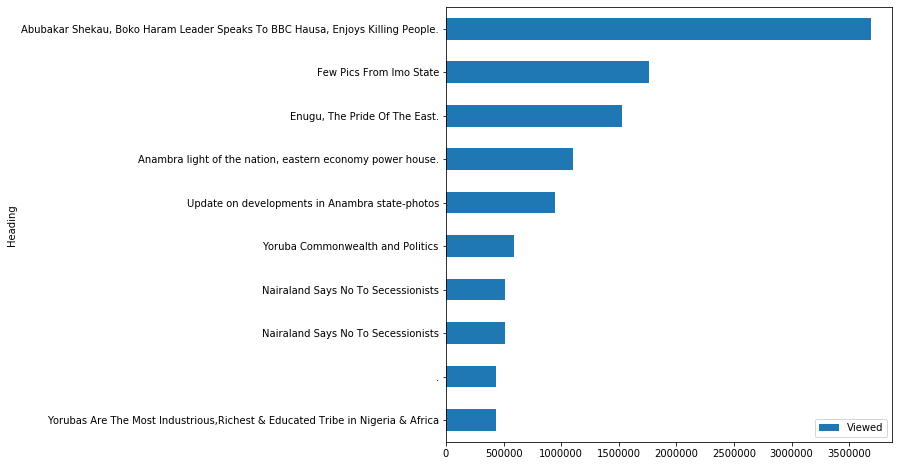

In [27]:
view1 = highest_view[:10].plot(x = 'Heading', y= 'Viewed', kind='barh', figsize = (8, 8))
view1.invert_yaxis()

### 2 What is the topic and original Poster of the topic with the highest number of view

In [28]:
# The top 10 Headings with the highest number of views and the person that posted them
poster_view = politics_1[['Heading', 'Poster','Viewed']].sort_values(by= 'Viewed', ascending=False)
poster_view[:10]

,Heading,Poster,Viewed
2226,"Abubakar Shekau, Boko Haram Leader Speaks To BBC Hausa, Enjoys Killing People.",yimiton,3690093
110,Few Pics From Imo State,PROUDIGBO,1762975
5302,"Enugu, The Pride Of The East.",spyder880,1523966
7087,"Anambra light of the nation, eastern economy power house.",FKO81,1102234
48,Update on developments in Anambra state-photos,Anambra1stSon,943420
7698,Yoruba Commonwealth and Politics,NaN,586487
0,Nairaland Says No To Secessionists,Seun,512130
861,Nairaland Says No To Secessionists,Seun,512130
1207,.,spyder880,434501
561,"Yorubas Are The Most Industrious,Richest & Educated Tribe in Nigeria & Africa",kn23h,433438


Text(0.5, 1.0, 'The Topic with the Highest view ')

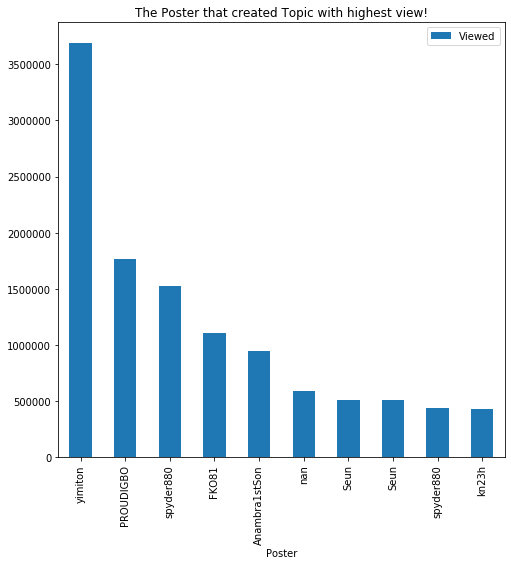

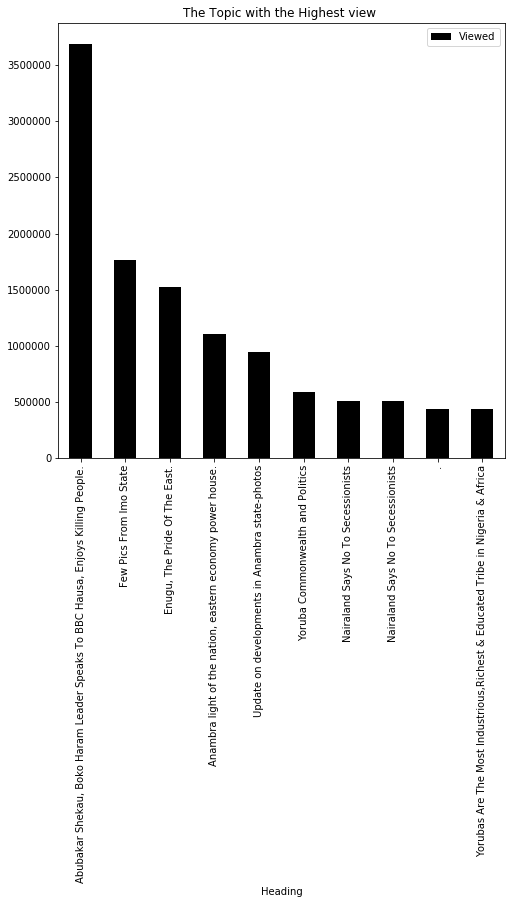

In [43]:
view2a = poster_view[:10].plot(x ='Poster', y='Viewed', kind='bar', figsize = (8, 8))
plt.title('The Poster that created Topic with highest view!')

view2b = poster_view[:10].plot(x ='Heading', y='Viewed', kind='bar', figsize = (8, 8), color='black')
plt.title('The Topic with the Highest view ')

### 3 What is the topic and original Poster of the topic with the highest number of comments

In [40]:
# The top 10 Headings with the highest number of comments and the person that posted them
poster_comment = politics_1[['Heading', 'Poster','Updated']].sort_values(by= 'Updated', ascending=False)
poster_comment[:10]

,Heading,Poster,Updated
9,Nigerian Politics: How To Publish A Book On Nigerian Politics,EditorsPalace,25002
110,Few Pics From Imo State,PROUDIGBO,24514
1207,.,spyder880,23398
48,Update on developments in Anambra state-photos,Anambra1stSon,22131
5302,"Enugu, The Pride Of The East.",spyder880,20445
30,Political Branding: How To Promote Your Political Ambition Or Career,EditorsPalace,20069
7087,"Anambra light of the nation, eastern economy power house.",FKO81,16730
7698,Yoruba Commonwealth and Politics,NaN,12269
561,"Yorubas Are The Most Industrious,Richest & Educated Tribe in Nigeria & Africa",kn23h,10047
12364,"Igbos Most Industrious, Innovative and Richest Tribe In Africa see proof",FKO81,5008


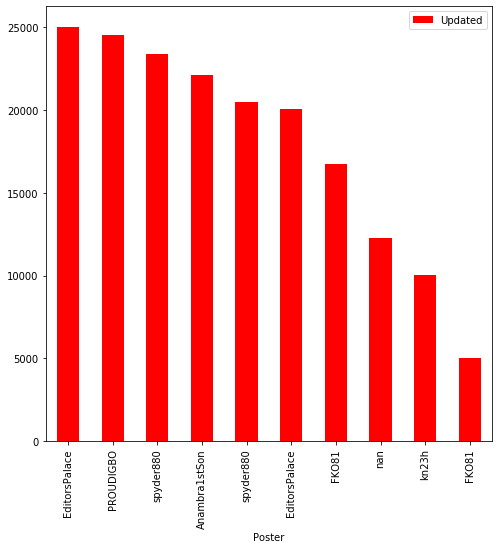

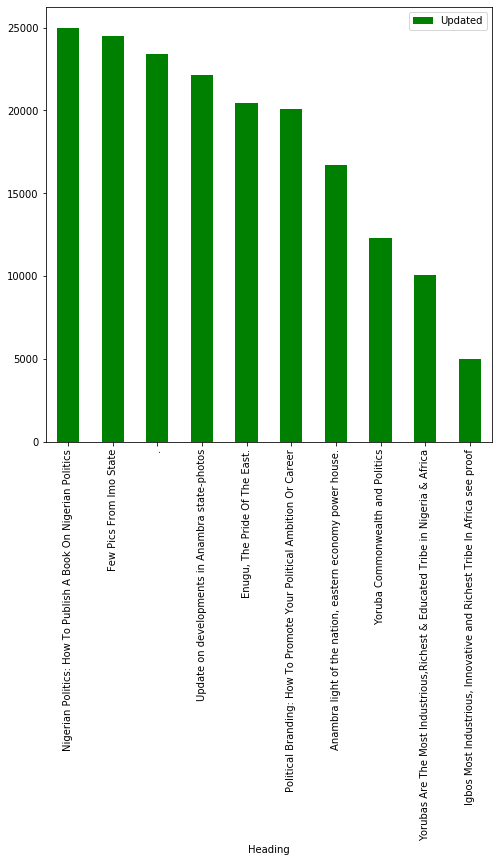

In [41]:
view3 = poster_comment[:10].plot(x ='Poster', y='Updated', kind='bar', figsize = (8, 8), color='red')
view3 = poster_comment[:10].plot(x ='Heading', y='Updated', kind='bar', figsize = (8, 8), color='green')

### 4 Which post was last updated and when in the 300 pages scraped

In [52]:
# Top 10 post to be last updated according to our records
old_post = politics_1[['Heading', 'Date_Last_Updated', 'Time']]
old_post1 = old_post.sort_values(['Date_Last_Updated', 'Time'], ascending=[True, True])
old_post1[:10]

,Heading,Date_Last_Updated,Time
16029,Group Back Tinubu For President In 2023,2021-03-09,10:07pm
16028,"Insult No One, Pray For Them — Uche Ogah Urges Supporters",2021-03-09,10:27pm
16027,Backlash As Bawa Addresses Staff Under The Sun,2021-03-09,10:29pm
16026,1957 Summary Of Nigeria's Problems (videos),2021-03-09,10:31pm
16025,Historic Footage Of Biafran Troops Celebrating After Recapturing Owerri,2021-03-09,10:33pm
16024,"Ghana, Togo, Benin Rep, Others to Enjoy Free Oil Under Biafran Government-IPOB",2021-03-09,10:34pm
16023,An Igboman Was Once An Oba In Benin Kingdom(how True Is That),2021-03-09,10:35pm
16022,What About Me?,2021-03-09,11:16pm
16021,As I Sat And Pondered...(a Poem),2021-03-09,11:21pm
16020,*social Media Trends For Tuesday 9th March 2021,2021-03-09,11:39pm


### 5 Who are the most active users in the politics section of Nairaland and how many topics did they create

In [56]:
# Top 15 users and the number of thread they have created
from collections import Counter
active_users = politics_1['Poster']
active_users = Counter(active_users)
users  = active_users.most_common(15)
print(users)

[(nan, 163), ('Islie', 132), ('dre11', 125), ('Elbinawi', 120), ('adenigga', 119), ('TheRareGem1', 111), ('sarrki', 106), ('shalom62', 102), ('Health16', 100), ('iwaeda', 93), ('Gjrich', 92), ('Ctorch', 90), ('nairalandankrah', 89), ('valentineuwakwe', 88), ('HonNL', 87)]


In [57]:
# Converting list of tuple to dataframe as to plot a graph
user_p = pd.DataFrame(users, columns=["Poster", "Thread_created"])
user_p

,Poster,Thread_created
0,NaN,163
1,Islie,132
2,dre11,125
3,Elbinawi,120
4,adenigga,119
5,TheRareGem1,111
6,sarrki,106
7,shalom62,102
8,Health16,100
9,iwaeda,93


In [68]:
# replace NaN value with others
user_p['Poster'] = user_p['Poster'].fillna('others')

In [69]:
user_p

,Poster,Thread_created
0,others,163
1,Islie,132
2,dre11,125
3,Elbinawi,120
4,adenigga,119
5,TheRareGem1,111
6,sarrki,106
7,shalom62,102
8,Health16,100
9,iwaeda,93


In [79]:
# Using the poster column as our new index
user_pp = user_p.set_index('Poster')
user_pp

,Thread_created
Poster,
others,163
Islie,132
dre11,125
Elbinawi,120
adenigga,119
TheRareGem1,111
sarrki,106
shalom62,102
Health16,100


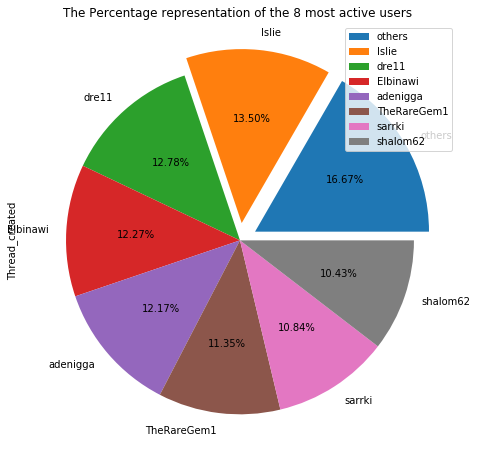

In [81]:
# The pie chart of the top 8 contributors
myexplode = [0.1, 0.1, 0, 0,0,0,0,0]
user_pp[:8].plot(kind="pie", explode= myexplode, autopct='%1.2f%%', y = 'Thread_created', figsize = (8, 8))
plt.title('The Percentage representation of the 8 most active users ')
plt.show()

### 6 Which month had the highest number of Headings

In [85]:
# Month with highest number of Headings
from collections import Counter
mon = politics_1['Month']
mon = Counter(mon)
print(mon)

Counter({5: 6909, 4: 5480, 3: 3583, 6: 129})


In [89]:
# Converting Dictionary to dataframe as to plot a graph
mon1 = pd.DataFrame(list(mon.items()), columns=["Month", "Total_number"])
mon1

,Month,Total_number
0,5,6909
1,6,129
2,4,5480
3,3,3583


In [91]:
# Using the assign method to add a new column to our dataset
mon2 = mon1.assign(Month_name = ['May', 'June', 'April', 'March'])
mon2

,Month,Total_number,Month_name
0,5,6909,May
1,6,129,June
2,4,5480,April
3,3,3583,March


In [94]:
mon3 = mon2.set_index('Month_name')

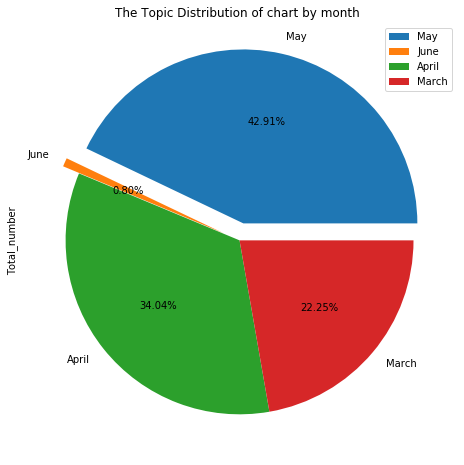

In [95]:
# The pie chart of Topic Distribution by month
myexplode = [0.1, 0.1, 0, 0]
mon3.plot(kind="pie", explode= myexplode, autopct='%1.2f%%', y = 'Total_number', figsize = (8, 8))
plt.title('The Topic Distribution of chart by month ')
plt.show()

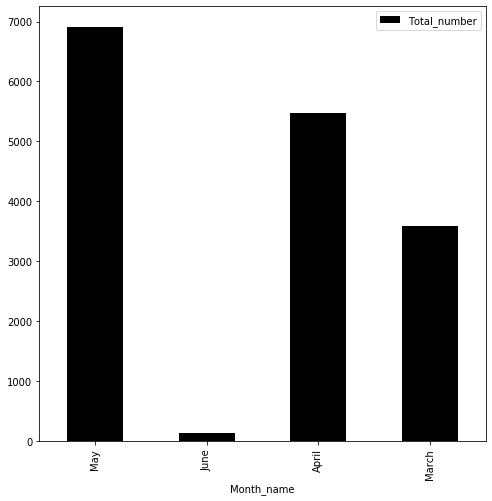

In [100]:
mon2.plot(x ='Month_name', y='Total_number', kind='bar', figsize = (8, 8), color='black')

## Additional Information <br>
#### 1. Some accounts seem disabled or suspended and this contributed to having Topics with no name as posters

# THE END